In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


mortgage_rate_df = pd.read_csv('MORTGAGE30US.csv', infer_datetime_format=True, parse_dates=True)
security_rate_df = pd.read_csv('WSHOMCB.csv', infer_datetime_format=True, parse_dates=True)

C:\Users\deers\AppData\Local\Temp\ipykernel_19568\1738345267.py:6: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  mortgage_rate_df = pd.read_csv('MORTGAGE30US.csv', infer_datetime_format=True, parse_dates=True)
C:\Users\deers\AppData\Local\Temp\ipykernel_19568\1738345267.py:7: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  security_rate_df = pd.read_csv('WSHOMCB.csv', infer_datetime_format=True, parse_dates=True)


In [33]:
mortgage_rate_df['DATE'] = pd.to_datetime(mortgage_rate_df['DATE'])
# drop all datra before 2001
mortgage_rate_df = mortgage_rate_df[mortgage_rate_df['DATE'] > '2001-01-01']
mortgage_rate_monthly = mortgage_rate_df.groupby(mortgage_rate_df['DATE'].dt.to_period("M")).mean()
mortgage_rate_monthly

,DATE,MORTGAGE30US
DATE,,
2001-01,2001-01-15 12:00:00,7.0325
2001-02,2001-02-12 12:00:00,7.0500
2001-03,2001-03-16 00:00:00,6.9520
2001-04,2001-04-16 12:00:00,7.0775
2001-05,2001-05-14 12:00:00,7.1450
...,...,...
2023-10,2023-10-15 12:00:00,7.6200
2023-11,2023-11-15 19:12:00,7.4420
2023-12,2023-12-17 12:00:00,6.8150


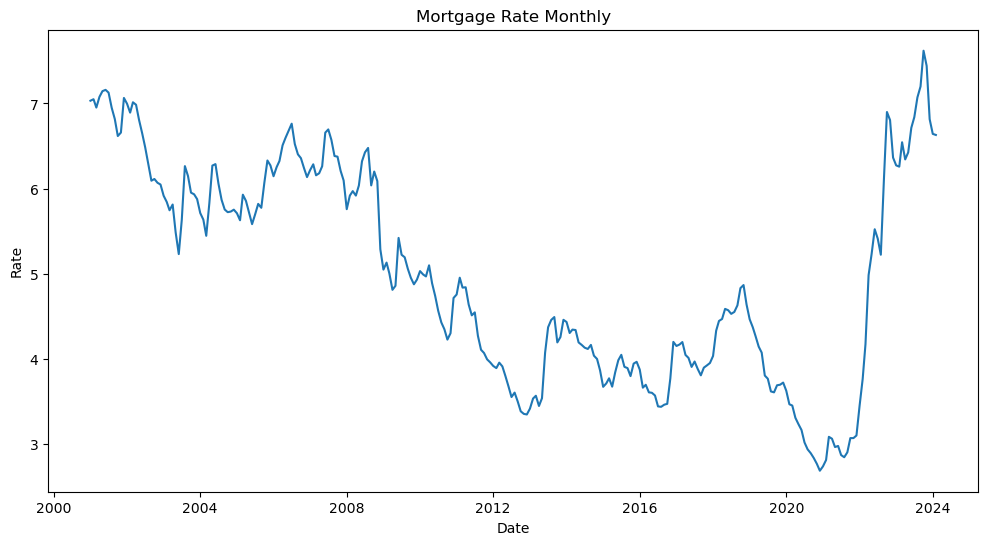

In [34]:
# plot mortgage rate monthly
mortgage_rate_monthly.index = mortgage_rate_monthly.index.to_timestamp()
plt.figure(figsize=(12, 6))
plt.plot(mortgage_rate_monthly['MORTGAGE30US'], label='Mortgage Rate Monthly')
plt.title('Mortgage Rate Monthly')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.show()

In [38]:

security_rate_df['DATE'] = pd.to_datetime(security_rate_df['DATE'])
# drop all data that has no value
security_rate_df = security_rate_df.dropna()
security_rate_df

,DATE,WSHOMCB
0,2002-12-18,0.0
1,2002-12-25,0.0
2,2003-01-01,0.0
3,2003-01-08,0.0
4,2003-01-15,0.0
...,...,...
1099,2024-01-10,2431773.0
1100,2024-01-17,2431710.0
1101,2024-01-24,2428644.0
1102,2024-01-31,2417156.0


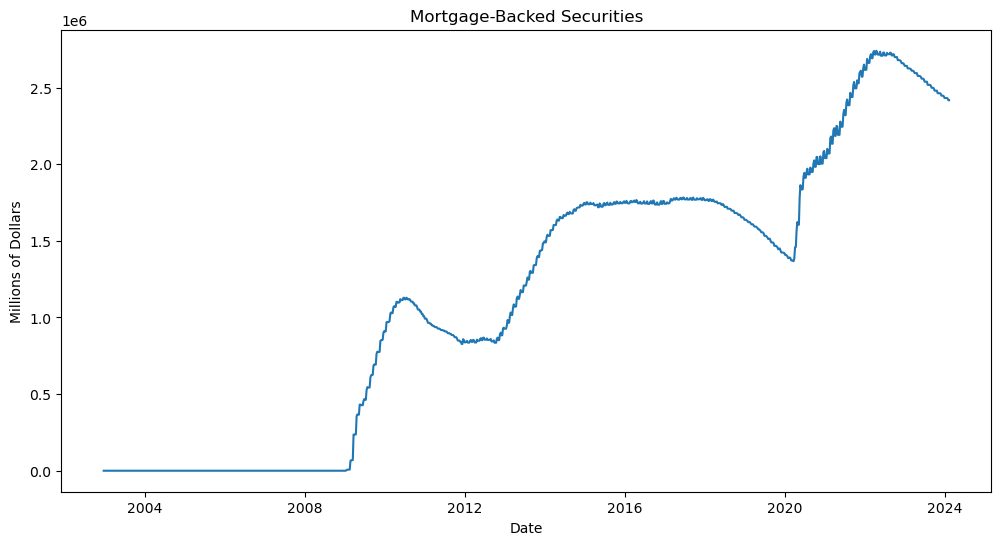

In [39]:
plt.figure(figsize=(12, 6))  # Set the width to 12 inches and height to 6 inches
plt.plot(security_rate_df['DATE'], security_rate_df['WSHOMCB'])
plt.title('Mortgage-Backed Securities')
plt.xlabel('Date')
plt.ylabel('Millions of Dollars')
plt.show()

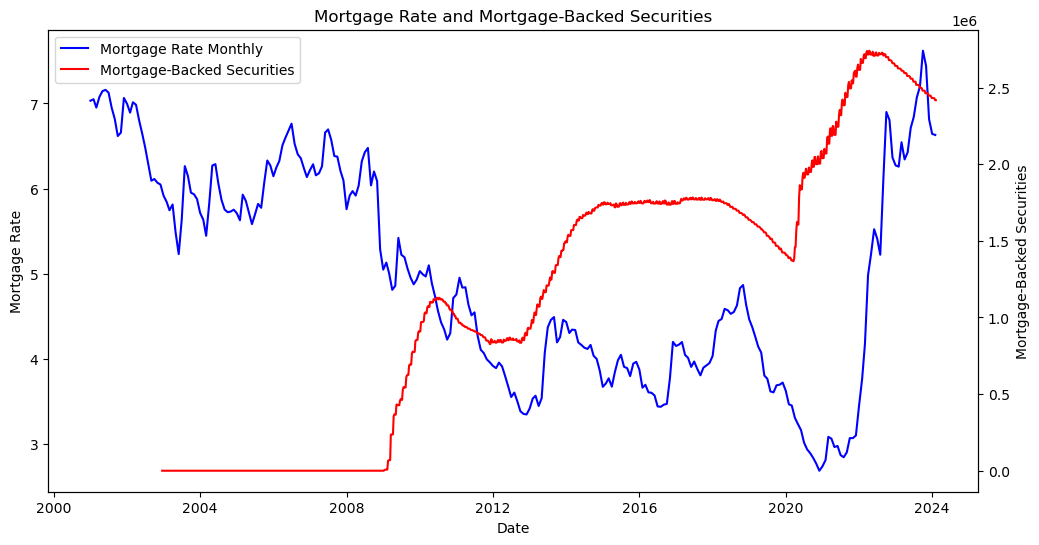

In [41]:
# plot mortgage rate and mortgage-backed securities
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

ax1.plot(mortgage_rate_monthly['MORTGAGE30US'], color='blue', label='Mortgage Rate Monthly')
ax1.set_ylabel('Mortgage Rate')

ax2.plot(security_rate_df['DATE'],security_rate_df['WSHOMCB'], color='red', label='Mortgage-Backed Securities')
ax2.set_ylabel('Mortgage-Backed Securities')

ax1.set_title('Mortgage Rate and Mortgage-Backed Securities')
ax1.set_xlabel('Date')

# Combine the legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2)

plt.show()